# Trabalho Prático 1

 ### Ex.1 : 

In [1]:
!pip install z3-solver
from z3 import *
from networkx import *
import networkx as nx
import random
import numpy

1. Um sistema de tráfego  é representado por um grafo orientado ligado. Os nodos denotam pontos de acesso e  os arcos denotam vias de comunicação só com um sentido . 
>  O grafo tem de ser ligado o que significa que entre cada par de nodos ⟨n1, n2⟩
 tem de existir um caminho $$n_1 \leadsto n_2$$ e um caminho $$n_2\leadsto n_1$$.

>a. Pretende-se fazer  manutenção interrompendo  determinadas vias. Determinar o maior número de vias que é possível remover mantendo o grafo ligado.

Para gerar o grafo de N nodos (neste caso, como pedido, é 32) usamos a função ***constroi_grafo*** e a ***adiciona_nodos***. 
A *adiciona_nodos* recebe o número total de nodos e o número máximo de descendentes, logo cada nodo terá entre 1 e D descendentes. Para cada nodo decide de forma aleatória o número de descendentes que vai ter dentro do limite descrito anteriormente. Em seguida, decide o destino do descendente confirmado que não é *loop* e que não há dois descendentes com o mesmo destino.
A função *constroi_grafo*, após chamar a função descrita anteriormente com as caracteristicas pedidas, verifica se o grafo é ligado ou não. Caso seja, retorna o grafo, caso mão seja, volta a chamar a função *adiciona_nodos*.

>b. Gerar aleatoriamente um tal grafo com  $$N=32$$ nodos.  Cada nodo tem um número aleatório de descendentes no intervalo $$\,1..3\,$$  cujos destinos são distintos entre si do nodo origem.

In [2]:
def grafo(Nr_Nodos, Nr_Descendentes):
    G = nx.gnr_graph(Nr_Nodos,0.1)
    while(is_strongly_connected(G) != True):
        G = nx.gnr_graph(Nr_Nodos,0.1)
        G = constroi_grafo(G,Nr_Nodos, Nr_Descendentes)
    return G

def constroi_grafo(G,Nr_Nodos, Nr_Descendentes):
    
    for origem in G:
        sem_caminho = [destino for destino in G if destino != origem and nx.has_path(G,origem,destino) == False]
        descendentes = random.randint(1,Nr_Descendentes)
        while(sem_caminho != [] and G.out_degree(origem) < descendentes):
            destino = random.choice(sem_caminho)
            G.add_edge(origem,destino)
            sem_caminho = [destino for destino in G if nx.has_path(G,origem,destino) == False]

    return G

True


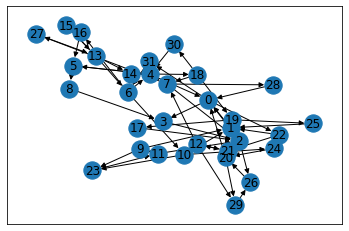

In [3]:
N = 32
D = 3
G = grafo(N,D)
print(is_strongly_connected(G))
nx.draw_networkx(G)

2. Pretende-se fazer  manutenção interrompendo  determinadas vias. Determinar o maior número de vias que é possível remover mantendo o grafo ligado.
Restrições:

1ª Restrição:
> Associa-se um valor a cada aresta. Este pode ser 1 caso esteja presente no
gráfico, ou 0 caso não esteja. Seja *a* uma aresta e *A* um conjunto de arestas do gráfico.
∀a ∈ A, 0 ≤ dica ≤ 1

2ª Restrição:
>Para cada par de nodos, calcula-se a lista de caminhos entre eles. Depois
verifica-se a validade de cada caminho multiplicando o valor associado a cada aresta do caminho. O resultado é 1 caso todas as arestas estejam presentes, ou 0 caso uma das arestas não
esteja. Por fim somamos estes valores e, para cada par de nodos, terá de ser maior
ou igual a 1, ou seja, tem de existir no mínimo um caminho no qual todas as arestas têm de estar
presentes. Seja o e d nodos do gráfico, N o conjunto de nodos e a uma aresta pertencente aos
caminhos (C).

$$\forall_{o,d∈N},\sum_{c ∈ C} (∏a
) >= 1$$

3ª Restrição:
> Usa a função minimize para minimizar o valor associado a cada aresta, de maneira
a ter o menor número de arestas possível no gráfico final.
$$\sum_{a ∈ A} dic_a$$

In [4]:
def desconectar_arestas(G, Nr_Nodos, Nr_Descendentes):
    arestas = {}
    #Criar a instancia do solver
    solver = Optimize()
    
    #Criar um dicionario para armazenar as arestas do grafo
    for aresta in G.edges():
        arestas[aresta] = Int(str(aresta))
        solver.add(arestas[aresta]>=0,arestas[aresta]<=1)

    for o in G.nodes():
        for d in G.nodes():
            if o != d:
                solver.add(sum([Product([arestas[aresta] for aresta in i]) for i in list(nx.all_simple_edge_paths(G,o,d))]) >= 1)

    solver.minimize(sum(list(arestas.values())))

    if solver.check() == sat:
        modelo_final = solver.model()
        return([aresta for aresta in G.edges() if modelo_final[arestas[aresta]] == 0])
    else:
        print("unsat")


[(0, 3), (1, 20), (2, 0), (4, 0), (4, 5), (5, 4), (6, 4), (7, 2), (9, 23), (10, 1), (11, 2), (12, 21), (13, 6), (14, 6), (18, 7), (19, 1), (20, 29), (21, 20), (22, 1)]
Número de linhas interrompidas: 19
True


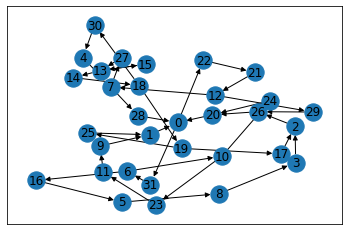

In [5]:
da = desconectar_arestas(G, N, D)
print(da)
print('Número de linhas interrompidas:',len(da))
for (a,b) in da:
    G.remove_edge(a,b)
print(nx.is_strongly_connected(G))
nx.draw_networkx(G)